# COGS 118B Final Project - FA24
- Jonathan Fuller
- A17026410
# Research Question

Using historical daily data on maximum and minimum temperatures, along with relative humidity data, from October through May, can I accurately estimate the amount of total snowfall (in centimeters) that will occur on a given day in those months using a machine learning model? The analysis excludes summer months (June through September) due to their historically negligible snowfall patterns.

# Data

## Data Overview

**Dataset #1**
  - Dataset Name: Sierra Nevada Mountains Dataset
  - Link to the dataset: https://www.kaggle.com/datasets/michaelbryantds/sierra-nevada-mountains-dataset 
  - Number of observations: 17897
  - Number of variables: 12


**Dataset #2**
  - Dataset Name: Blue Canyon - Nyack Airport Daily Relative Humidity 
  - Link to the dataset: 'Blue Canyon - Nyack Airport Daily Relative Humidity.csv'
  - Number of observations: 17897
  - Number of variables: 3

## Sierra Nevada Mountains Dataset

In [1]:
## LOAD/CLEAN/TIDY/WRANGLE THE DATA
import pandas as pd
import numpy as np

def print_data_summary(df,wanted_columns):
    print("\nDataset Summary:")
    print(f"Shape: {df.shape}")
    print("\nMissing Values:")
    print(df.isna().sum())
    print("\nData Types:")
    print(df.dtypes)
    print("\nDescriptive Statistics:")
    return df[wanted_columns].describe()

# read in data 
cssl_data = pd.read_csv('donner_pass.csv')

# select relevant columns
selected_columns = ['Date', 'Air Temp Max (C)', 'Air Temp Min (C)', 'New Snow (cm)']
cssl_data = cssl_data[selected_columns]


#take a look at dataframe 
cssl_data

,Date,Air Temp Max (C),Air Temp Min (C),New Snow (cm)
0,1970-10-01,22.2,4.995,0
1,1970-10-02,24.42,4.995,0
2,1970-10-03,23.31,5.55,0
3,1970-10-04,22.755,3.33,0
4,1970-10-05,17.205,3.33,0
...,...,...,...,...
17892,2019-09-26,23,8,0
17893,2019-09-27,18,7,0
17894,2019-09-28,8,-3,0
17895,2019-09-29,2,-3,2.5


In [2]:
# remove unwanted entries from dataframe
unwanted_values = {'New Snow (cm)': ['--','.'],'Air Temp Max (C)': ['.', '--'],'Air Temp Min (C)': ['.', '--']}

for column, values in unwanted_values.items():
    cssl_data = cssl_data[~cssl_data[column].isin(values)]
cssl_data = cssl_data.dropna()
cssl_data = cssl_data.replace('T',0)

# convert data types
cssl_data['Date'] = pd.to_datetime(cssl_data['Date'])
numeric_columns = ['Air Temp Max (C)', 'Air Temp Min (C)', 'New Snow (cm)']
cssl_data[numeric_columns] = cssl_data[numeric_columns].astype(float)

# summary of cssl_data
print_data_summary(cssl_data,['Air Temp Max (C)', 'Air Temp Min (C)', 'New Snow (cm)'])


Dataset Summary:
Shape: (17554, 4)

Missing Values:
Date                0
Air Temp Max (C)    0
Air Temp Min (C)    0
New Snow (cm)       0
dtype: int64

Data Types:
Date                datetime64[ns]
Air Temp Max (C)           float64
Air Temp Min (C)           float64
New Snow (cm)              float64
dtype: object

Descriptive Statistics:


,Air Temp Max (C),Air Temp Min (C),New Snow (cm)
count,17554.000000,17554.000000,17554.000000
mean,12.774714,-0.828637,2.733176
std,9.418800,6.316899,9.225383
min,-12.210000,-25.530000,0.000000
25%,4.995000,-5.000000,0.000000
50%,12.210000,-1.000000,0.000000
75%,21.000000,4.000000,0.000000
max,37.000000,87.000000,132.080000


In [3]:
# calculate the average snowfall for each month to determine which months to exclude 
monthly_total_snowfall = cssl_data.groupby([cssl_data['Date'].dt.year, cssl_data['Date'].dt.month])['New Snow (cm)'].sum()
average_monthly_snowfall = monthly_total_snowfall.groupby(level=1).mean()
average_monthly_snowfall

Date
1     182.578571
2     196.574898
3     184.853673
4      89.163061
5      25.525673
6       4.124082
7       0.000000
8       0.000000
9       3.738776
10     24.962245
11     97.676771
12    171.941980
Name: New Snow (cm), dtype: float64

In [4]:
# exclude June, July, August, and September due to their low snowfall 
cssl_data = cssl_data[~cssl_data['Date'].dt.month.isin([6,7,8,9])]
print_data_summary(cssl_data,['Air Temp Max (C)', 'Air Temp Min (C)', 'New Snow (cm)'])


Dataset Summary:
Shape: (11618, 4)

Missing Values:
Date                0
Air Temp Max (C)    0
Air Temp Min (C)    0
New Snow (cm)       0
dtype: int64

Data Types:
Date                datetime64[ns]
Air Temp Max (C)           float64
Air Temp Min (C)           float64
New Snow (cm)              float64
dtype: object

Descriptive Statistics:


,Air Temp Max (C),Air Temp Min (C),New Snow (cm)
count,11618.000000,11618.000000,11618.000000
mean,7.890921,-4.070447,4.096479
std,6.996173,4.732780,11.076267
min,-12.210000,-25.530000,0.000000
25%,2.220000,-7.000000,0.000000
50%,7.770000,-3.330000,0.000000
75%,13.000000,-1.000000,1.000000
max,29.000000,12.000000,132.080000


## Blue Canyon - Nyack Airport Daily Relative Humidity Dataset

In [5]:
## LOAD/CLEAN/TIDY/WRANGLE THE DATA 

# read in the data 
humidity_data = pd.read_csv('Blue Canyon - Nyack Airport Daily Relative Humidity.csv')

#select relevant columns 
humidity_columns = ['datetime','humidity']
humidity_data = humidity_data[humidity_columns]

#take a look at dataframe 
humidity_data

,datetime,humidity
0,1970-10-01,14.1
1,1970-10-02,13.5
2,1970-10-03,15.3
3,1970-10-04,25.8
4,1970-10-05,26.4
...,...,...
17892,2019-09-26,44.5
17893,2019-09-27,69.2
17894,2019-09-28,85.5
17895,2019-09-29,83.4


In [6]:
# drop null values 
humidity_data = humidity_data.dropna()

# change column names 
humidity_data = humidity_data.rename({'datetime':'Date','humidity':'Relative Humidity (%)'},axis='columns')

# convert 'Date' column to datetime datatype 
humidity_data['Date'] = pd.to_datetime(humidity_data['Date'])

## Merged Dataset

In [7]:
#merge humidity_data and cssl_data
cssl_data_humidity = pd.merge(cssl_data, humidity_data, on='Date', how='inner')

# summary of merged dataset 
print_data_summary(cssl_data_humidity,['Air Temp Max (C)', 'Air Temp Min (C)', 'New Snow (cm)'])


Dataset Summary:
Shape: (11444, 5)

Missing Values:
Date                     0
Air Temp Max (C)         0
Air Temp Min (C)         0
New Snow (cm)            0
Relative Humidity (%)    0
dtype: int64

Data Types:
Date                     datetime64[ns]
Air Temp Max (C)                float64
Air Temp Min (C)                float64
New Snow (cm)                   float64
Relative Humidity (%)           float64
dtype: object

Descriptive Statistics:


,Air Temp Max (C),Air Temp Min (C),New Snow (cm)
count,11444.000000,11444.000000,11444.000000
mean,7.893623,-4.080463,4.069643
std,7.002468,4.737617,11.038661
min,-12.210000,-25.530000,0.000000
25%,2.220000,-7.000000,0.000000
50%,7.770000,-3.330000,0.000000
75%,13.000000,-1.000000,1.000000
max,29.000000,12.000000,132.080000


# Data Analysis

### Univariate Distribution of Variables

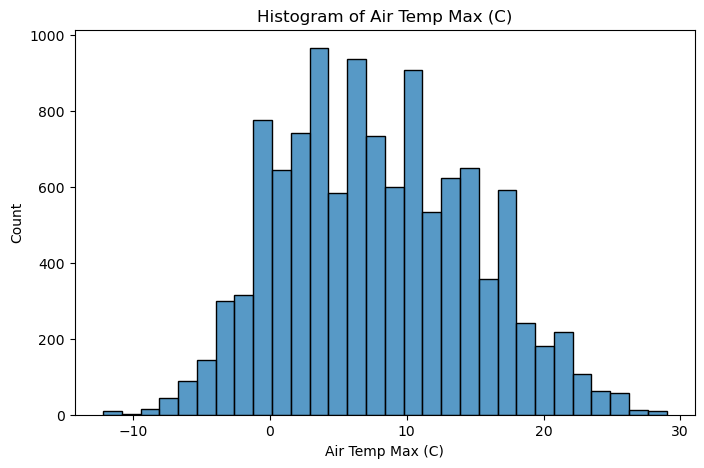

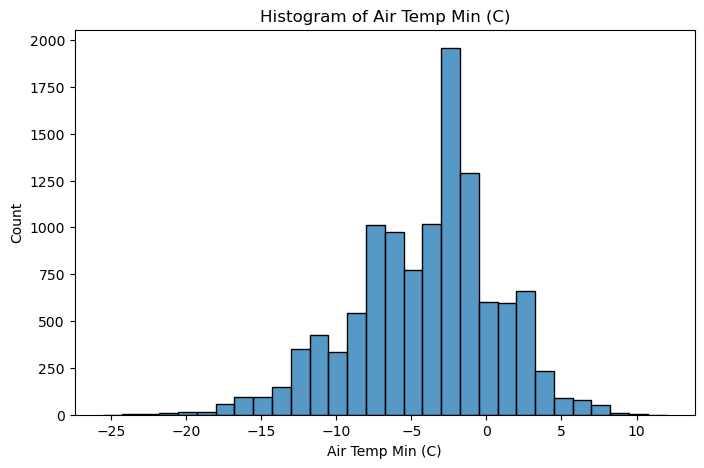

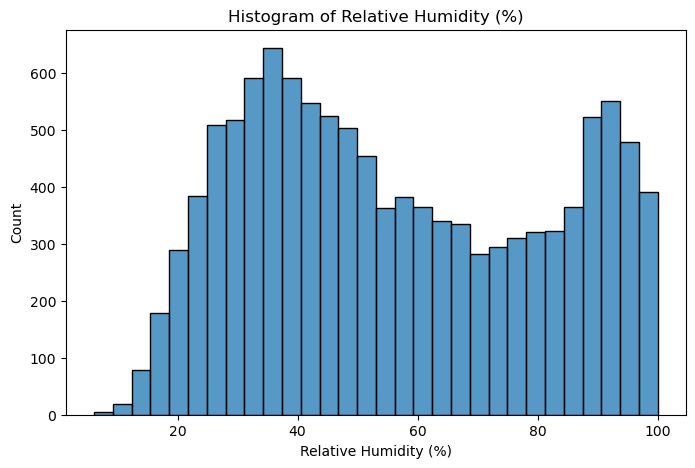

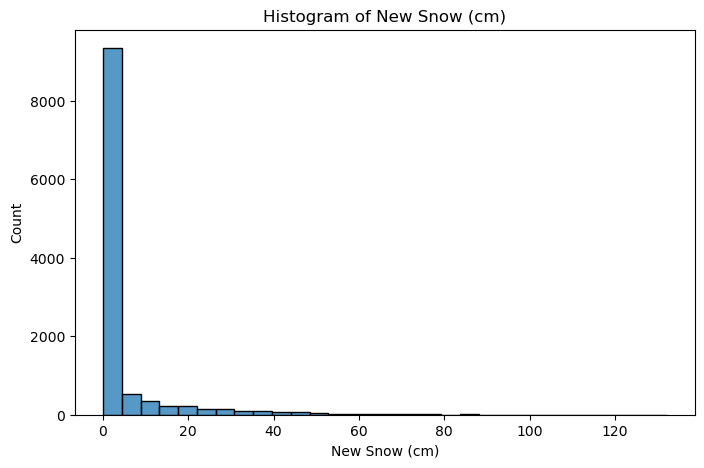

In [8]:
import seaborn as sns 
import matplotlib.pyplot as plt

columns_to_plot = [
    'Air Temp Max (C)', 
    'Air Temp Min (C)', 
    'Relative Humidity (%)', 
    'New Snow (cm)',]

for column in columns_to_plot:
    plt.figure(figsize=(8, 5))
    sns.histplot(cssl_data_humidity[column],bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()


The univariate distributions of my weather variables tells me a few distinct patterns for my snowfall prediction. The maximum air temperature shows a roughly normal distribution ranging from -10°C to 30°C with a peak around 5-10°C and slight right skew, while minimum air temperature displays a more pronounced peak near 0°C, ranging from -25°C to 10°C, with clustering around the freezing point, which is critical for snow formation. Relative humidity exhibits a bimodal distribution with peaks at 35-40% and 90-95%, suggesting two predominant weather patterns: drier conditions and very humid conditions. The new snowfall distribution is extremely right-skewed, displaying a massive peak at 0 cm and a long tail extending to 120 cm, indicating that while most days have little to no snowfall, significant snow events (which are relatively rare) can produce substantial accumulation.

I observed significant changes after excluding summer months and incorporating relative humidity data. The temperature dataset initially included 17,554 observations, which was reduced to 11,618 after excluding summer months, and further to 11,444 when merged with relative humidity data. The mean maximum temperature decreased substantially from 12.77°C to 7.89°C after summer exclusion, with reduced variability (SD decreasing from 9.42 to 7.00). Similarly, minimum temperatures shifted from a mean of -0.83°C to -4.07°C, showing more concentrated cold weather patterns (SD decreasing from 6.32 to 4.73).

While the overall mean snowfall increased from 2.73cm to 4.07cm after summer exclusion, the large standard deviations (initially 9.23cm, increasing to 11.04cm) and unchanged maximum value (132.08cm) indicate significant variability in snowfall events. The persistence of a zero median and 25th percentile across all datasets, combined with a small 75th percentile (1.00cm), reinforces my observations about the zero-inflated nature of snowfall data. The consistent statistics between the summer-excluded temperature dataset and the relative humidity dataset (means and standard deviations differing only in the third decimal place) suggest minimal data loss during the merge, maintaining the integrity of my data.

### Bivariate Relationships Between Features and New Snow (cm)

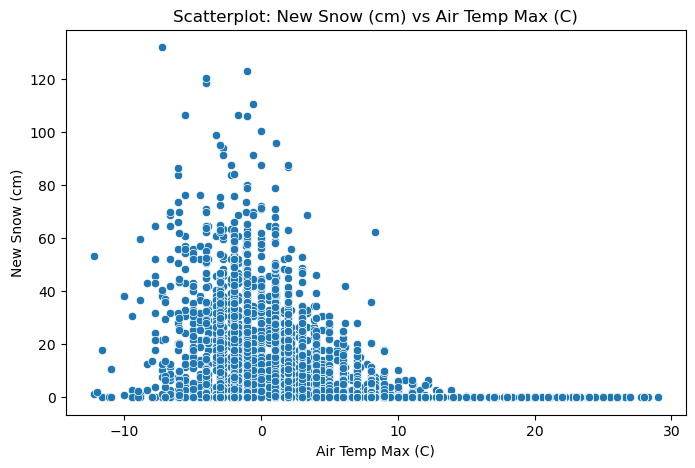

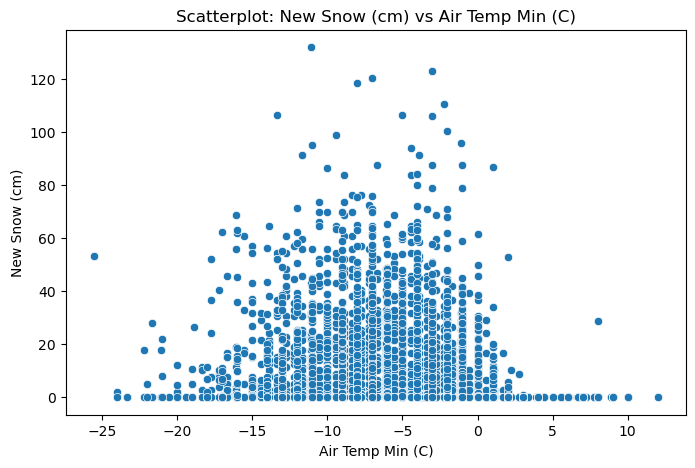

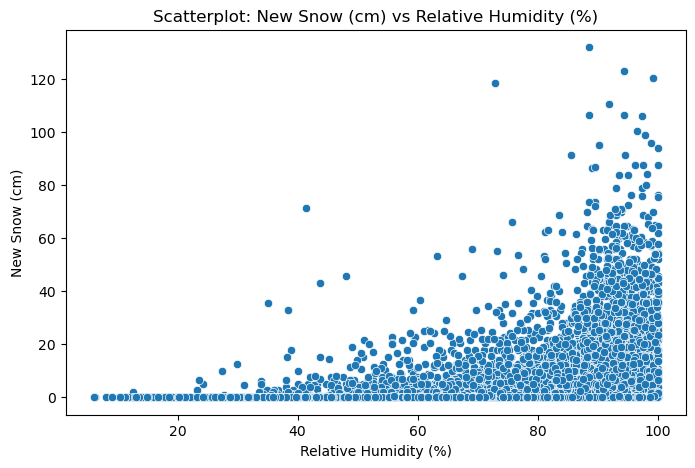

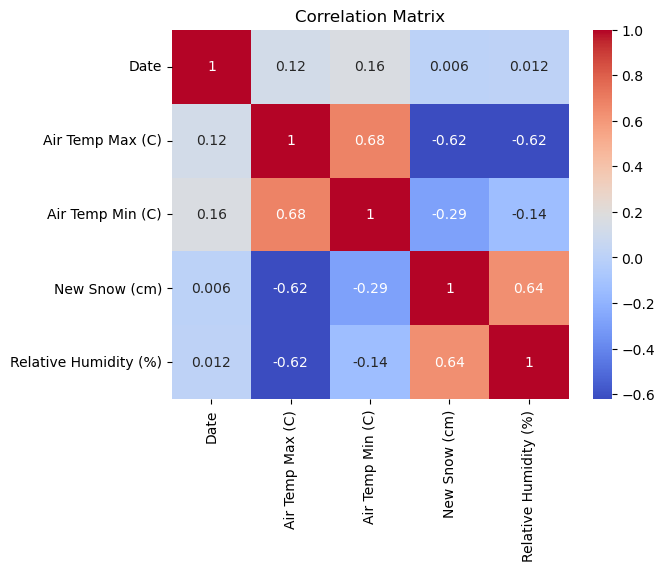

In [9]:
# Define pairs of columns for scatterplots
scatterplot_pairs = [
    ('Air Temp Max (C)', 'New Snow (cm)'),
    ('Air Temp Min (C)', 'New Snow (cm)'),
    ('Relative Humidity (%)', 'New Snow (cm)'),
]

# Create scatterplots in a loop
for x_col, y_col in scatterplot_pairs:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=x_col, y=y_col, data=cssl_data_humidity)
    plt.title(f'Scatterplot: {y_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# Check for correlation between variables 
correlation_matrix = cssl_data_humidity.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The bivariate analysis of my data will dictate where I go with my model selection. The scatterplots expose three key relationships: Maximum Temperature vs Snowfall demonstrates a triangular pattern with a negative trend, where snowfall decreases as temperature increases, showing high variability at lower temperatures and a clear upper boundary where snow becomes impossible; Minimum Temperature vs Snowfall exhibits a similar but less pronounced triangular pattern, with maximum snowfall occurring around -5°C to -10°C; and Relative Humidity vs Snowfall displays a positive but non-linear relationship with a distinct pattern, where higher humidity enables but doesn't guarantee snowfall, while low humidity practically prevents it.

The correlation matrix shows moderate relationships (Maximum Temperature: -0.62, Minimum Temperature: -0.29, and Relative Humidity: 0.64 correlation with snowfall), and Spearman rank correlation was used to account for the non-linear relationships. My scatterplots show me that my data are displaying non-linear patterns with certain thresholds (no snow above certain temperatures), interaction effects (temperature and humidity working in tandem), boundary conditions (clear upper limits on snowfall under certain conditions), and zero-inflation (many days with no snow regardless of conditions). This non-linearity explains why linear regression may not be the best choice - it assumes linear relationships and constant variance, neither of which is necessarily true for my data. A different supervised ML model (e.g. Random Forest model) may be better suited because it can deal with non-linear relationships.

### Transform New Snow (cm)


In [10]:
cssl_data_humidity['New Snow (cm)_log10'] = np.log10(cssl_data_humidity['New Snow (cm)']+1)
cssl_data_humidity['New Snow (cm)_sqrt'] = np.sqrt(cssl_data_humidity['New Snow (cm)'])

I implemented transformations to address the skewed nature of my snowfall measurements. The code applies a logarithmic transformation (log10) and a square root transformation. The logarithmic transformation adds 1 to the snowfall values before taking the log (log10(x+1)) to handle zero values, while the square root transformation directly takes the square root of the original values.

### Distributions of Transformed New Snow (cm)

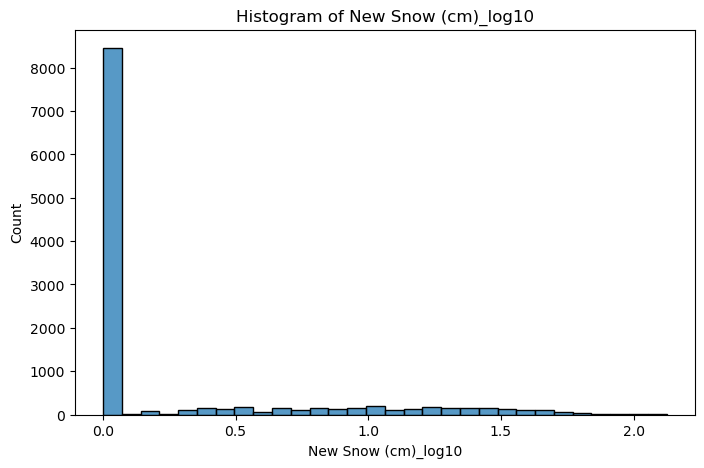

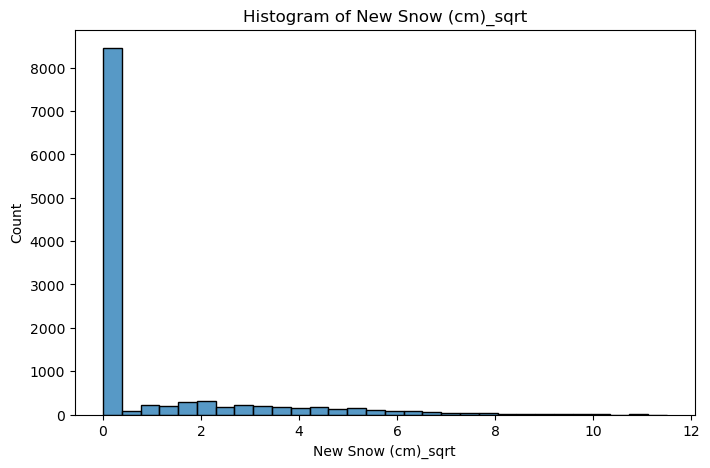

In [11]:
columns_to_plot_2 = [
    'New Snow (cm)_log10', 
    'New Snow (cm)_sqrt']

for column in columns_to_plot_2:
    plt.figure(figsize=(8, 5))
    sns.histplot(cssl_data_humidity[column],bins=30)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

My histograms show that neither transformation fully normalizes the snowfall distribution, which is important for my modeling decisions. The log10 transformation (ranging from 0 to 2) still shows a dominant peak at zero, but spreads out the non-zero values more evenly across the transformed scale, particularly in the range of 0.5 to 1.5. Similarly, the square root transformation (ranging from 0 to 12) maintains the peak at zero but creates a more gradual decline in frequency for larger values, with most of the transformed non-zero measurements falling between 2 and 6. This peak at zero, even after transformations, reinforces my decision to not use linear regression, because it indicates that the pattern of snowfall occurrence (many zero days versus snow days) cannot be fully addressed through simple data transformations alone. This non-transformable zero-inflation is crucial to what I decide for my modeling strategy.


### Bivariate Relationships with New Snow (cm)_log10 and New Snow (cm)_sqrt

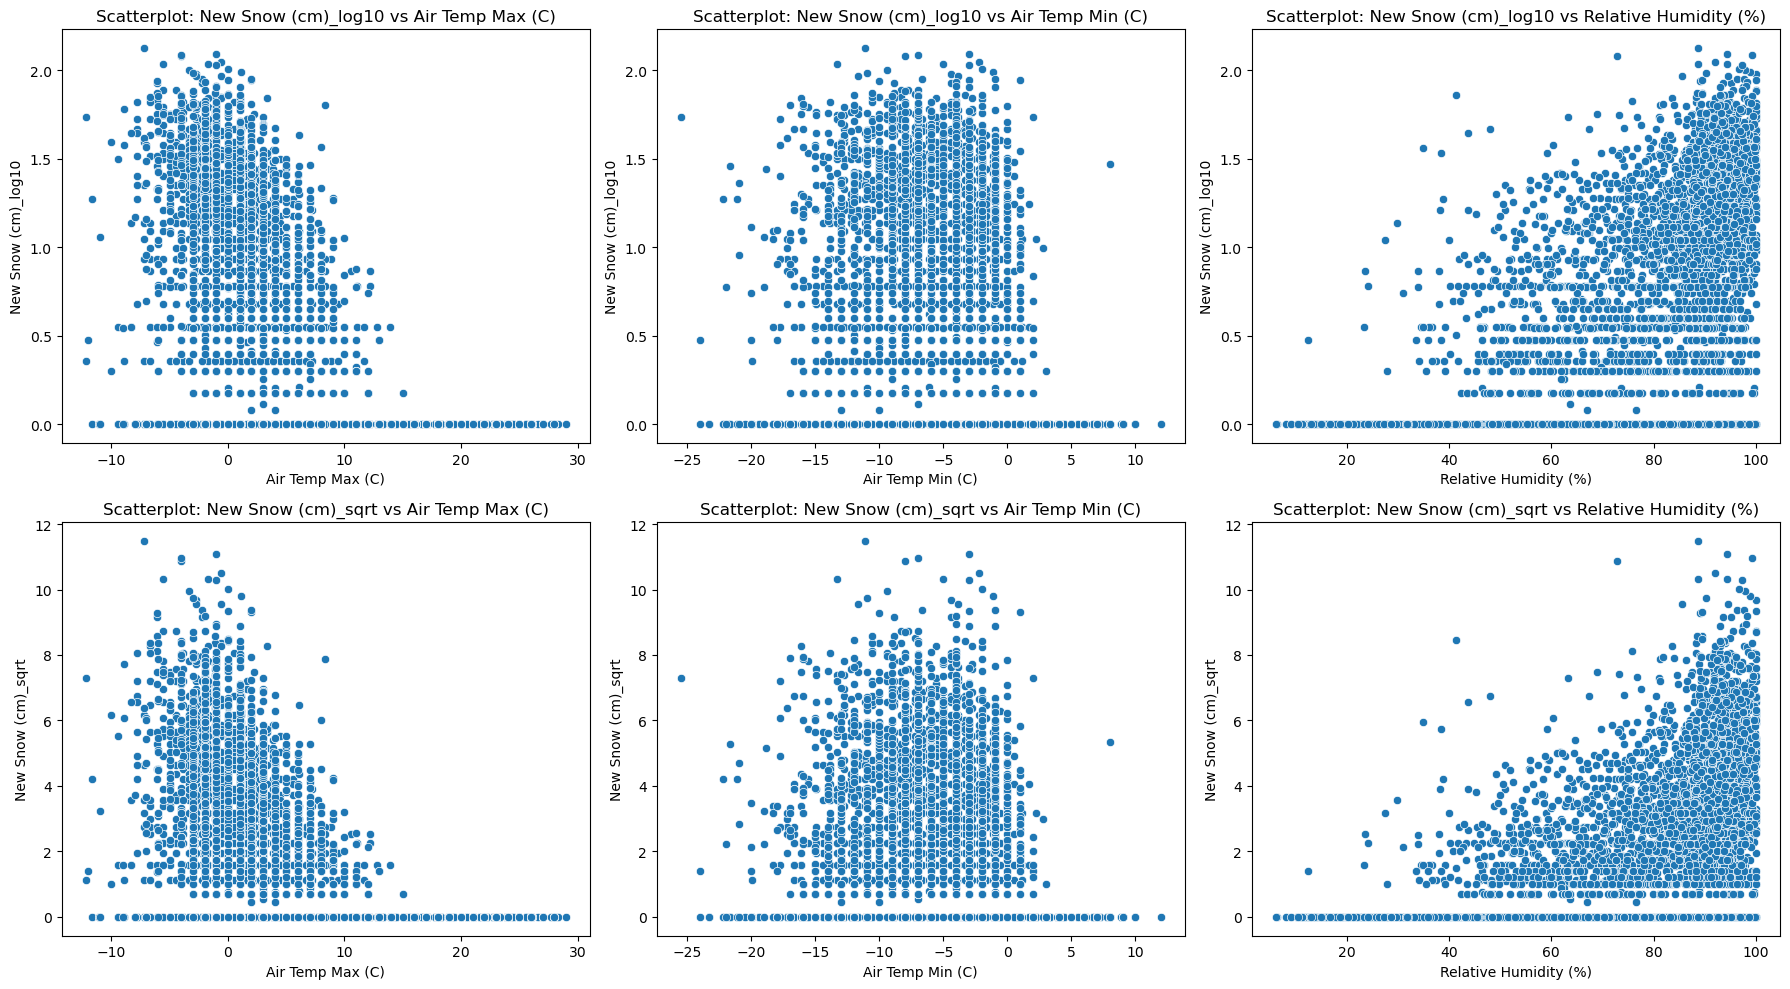

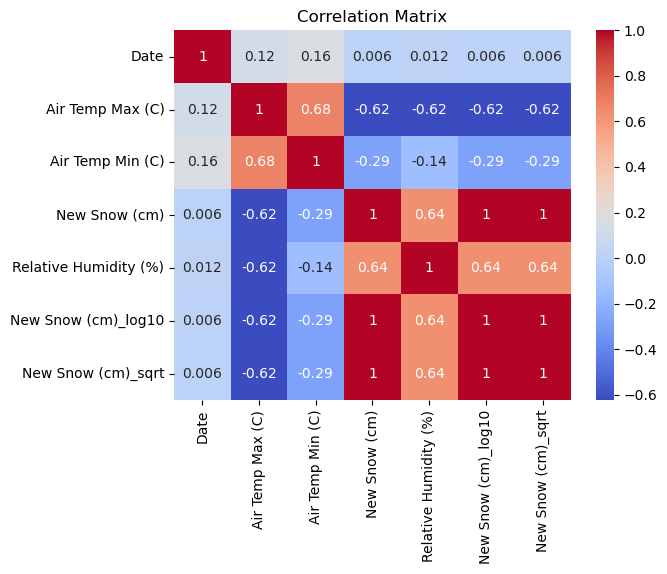

In [12]:
# Define scatterplot pairs
scatterplot_pairs_2 = [
    ('Air Temp Max (C)', 'New Snow (cm)_log10'),
    ('Air Temp Min (C)', 'New Snow (cm)_log10'),
    ('Relative Humidity (%)', 'New Snow (cm)_log10'),
    ('Air Temp Max (C)', 'New Snow (cm)_sqrt'),
    ('Air Temp Min (C)', 'New Snow (cm)_sqrt'),
    ('Relative Humidity (%)', 'New Snow (cm)_sqrt')
]

# Create subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))  # 2 rows, 3 columns

# Plot each scatterplot in the appropriate subplot
for (x_col, y_col), ax in zip(scatterplot_pairs_2, axes.flatten()):
    sns.scatterplot(x=x_col, y=y_col, data=cssl_data_humidity, ax=ax)
    ax.set_title(f'Scatterplot: {y_col} vs {x_col}')
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)

# Adjust layout
plt.tight_layout()
plt.show()

# Check for correlation between variables 
correlation_matrix = cssl_data_humidity.corr(method='spearman')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The transformed bivariate relationships and correlation matrix for my snowfall data show non-linear patterns despite the transformations. After transformation, maximum temperature's correlation coefficient with both log10 and square root was -.62 which is identical to its correlation coefficient with untransformed snowfall. Similarly, minimum air temperature also had a correlation coefficient with log10 and square root that was identical to its coefficient with untransformed snowfall of -.29. Both maximum and minimum had consistent correlation coefficients because Spearman's rank coefficient is resistant to transformations since it considers relative ranking of data points. The triangular pattern still shows itself in the temperature relationships, indicating that transformations help spread the data but don't linearize the relationships. Relative humidity also had a consistent coefficient of .64 with transformed and untransformed snowfall. However, the transformation of snowfall reveals a clearer envelope pattern after transformation, particularly in the square root transformation, while maintaining a non-linear relationship with a distinct lower boundary, which suggests minimum humidity requirements for snowfall.


The correlation matrix also shows that the transformed snowfalls have a correlation coefficient of 1 with untransformed snowfall while maximum and minimum temperatures show strong correlation (0.68), suggesting potential multicollinearity. The Date variable shows minimal correlation with all variables, indicating no strong temporal trends. Despite the transformations providing a better spread of the snowfall data, these non-linear patterns reinforce my decision to not use linear methods. While the transformations help visualize the relationships more clearly, they don't fundamentally alter their non-linear nature.

### Check for Multicollinearity 

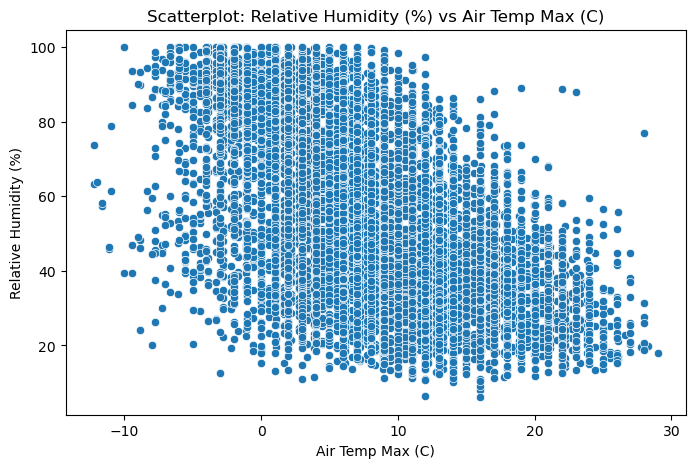

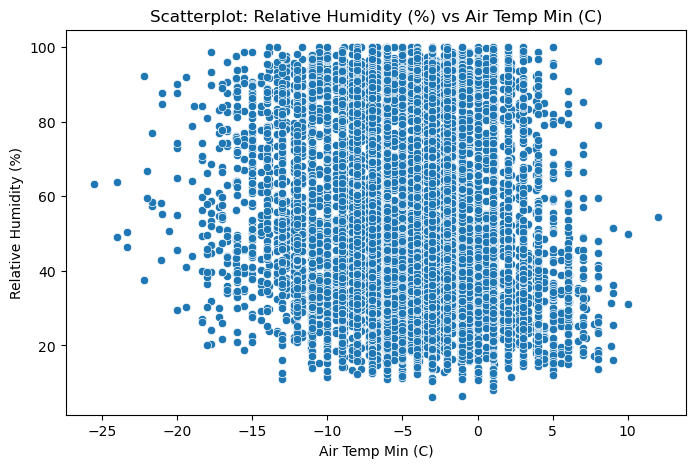

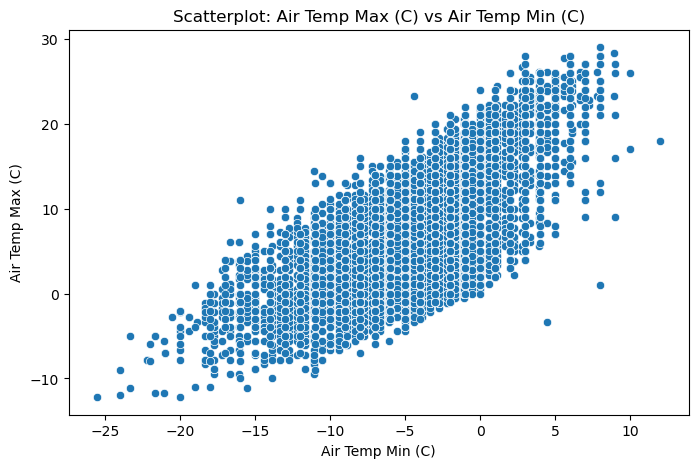

In [13]:
# Plot scatterplot between Relative Humidity (%) and Air Temp Max (C) + Air Temp Min (C)
scatterplot_pairs_3 = [
    ('Air Temp Max (C)', 'Relative Humidity (%)'),
    ('Air Temp Min (C)', 'Relative Humidity (%)')
]

# Create scatterplots in a loop
for x_col, y_col in scatterplot_pairs_3:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=x_col, y=y_col, data=cssl_data_humidity)
    plt.title(f'Scatterplot: {y_col} vs {x_col}')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

# Plot scatterplot between Air Temp Min (C) and Air Temp Max (C)
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Air Temp Min (C)', y='Air Temp Max (C)', data=cssl_data_humidity)
plt.title('Scatterplot: Air Temp Max (C) vs Air Temp Min (C)')
plt.xlabel('Air Temp Min (C)')
plt.ylabel('Air Temp Max (C)')
plt.show()

The relationship between relative humidity and maximum temperature shows a distinct wedge-shaped pattern, with humidity values spreading out as temperature increases but bounded by an upper limit that decreases as temperature rises (correlation -0.62). This suggests that while higher temperatures generally allow for lower humidity levels, there's a physical constraint on maximum possible humidity at higher temperatures. Although there is a moderate correlation between relative humidity and maximum temperature, since it does not appear to be a perfectly linear relationship, it may not violate the assumption of no multicollinearity in a linear model.

Similarly, the relationship between relative humidity and minimum temperature exhibits a comparable but less pronounced wedge pattern (correlation -0.14). Both relationships show clear non-linear boundaries and considerable spread, particularly in the middle temperature ranges. Since minimum temperature and relative humidity are not highly correlated and do not have a linear relationship, it does not appear that multicollinearity exists. These patterns align with atmospheric physics - warmer air can hold more moisture before reaching saturation, leading to lower relative humidity values, while colder air reaches saturation (100% relative humidity) with less absolute moisture.

Furthermore, when examining the relationship between maximum air temperature and minimum air temperature there does appear to be a roughly linear relationship with a moderate to strong correlation of .68. Since there is a roughly linear relationship and a moderately strong correlation, what is known as imperfect multicollinearity may be present. The potential presence of imperfect multicollinearity coupled with the non-linear relationships of the predictor variables with snowfall further reinforces the notion that I need a model that can handle more complex interactions between predictor variables without assuming linear relationships or independence between predictors.

# Supervised Regression Models - Random Forest & XGBoost

## Random Forest Regression 


Training Metrics:
RMSE: 6.16 cm
MAE: 2.45 cm
R²: 0.697

Test Metrics:
RMSE: 7.52 cm
MAE: 3.26 cm
R²: 0.475

Cross-validation R² scores: [0.46904591 0.49914663 0.4410627  0.37975494 0.49466056]
Mean CV R²: 0.457 (+/- 0.087)

Feature Importance:
                 feature  importance
2  Relative Humidity (%)    0.612492
0       Air Temp Max (C)    0.284433
1       Air Temp Min (C)    0.103075


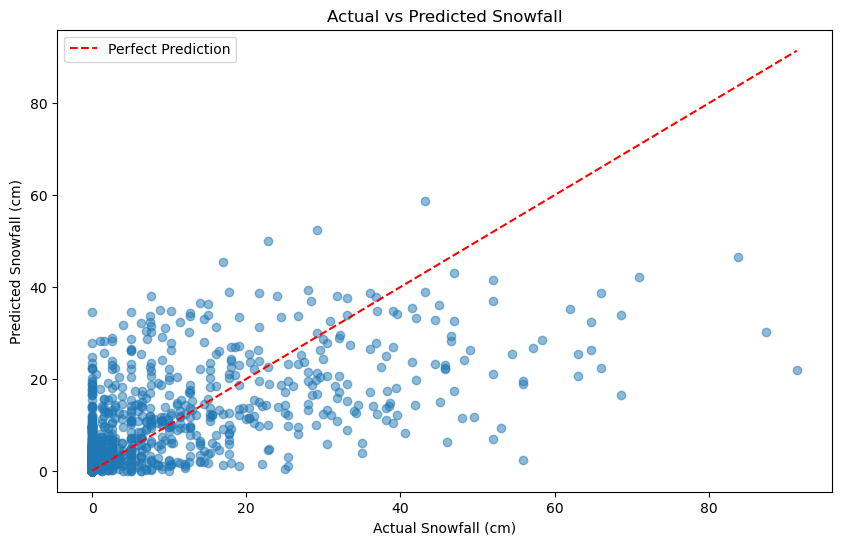

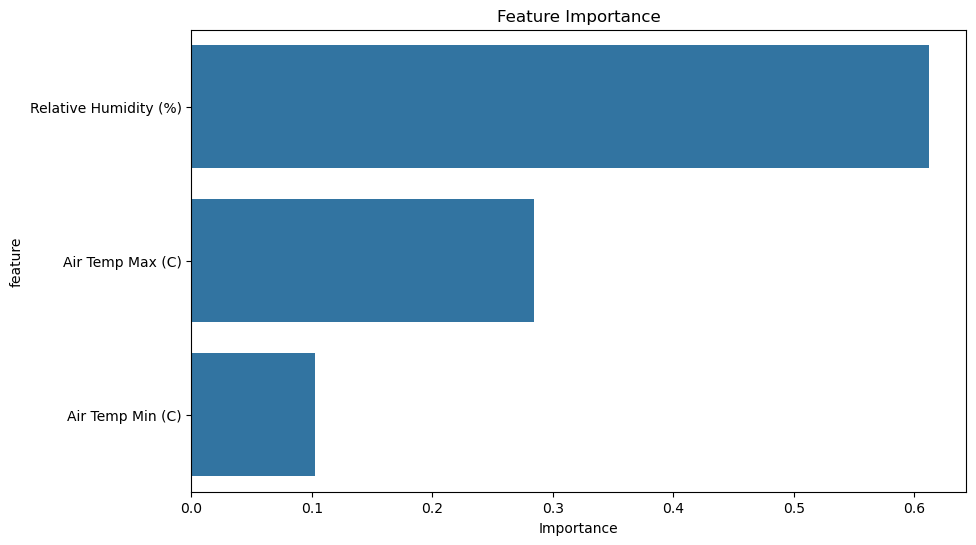

In [14]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare features and target
X = cssl_data_humidity[['Air Temp Max (C)', 'Air Temp Min (C)', 'Relative Humidity (%)']]
y = cssl_data_humidity['New Snow (cm)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the model with parameters suited for this problem
rf_model = RandomForestRegressor(
    n_estimators=200,          # More trees for better handling of zero-inflation
    max_depth=15,              # Limit depth to prevent overfitting
    min_samples_split=5,       # Require more samples to split
    min_samples_leaf=4,        # Require more samples in leaves
    random_state=42,
    n_jobs=-1                  # Use all available cores
)

# Train the model
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train_scaled)
y_pred_test = rf_model.predict(X_test_scaled)

# Calculate metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"RMSE: {rmse:.2f} cm")
    print(f"MAE: {mae:.2f} cm")
    print(f"R²: {r2:.3f}")
    
    return rmse, mae, r2

# Calculate metrics for both sets
train_metrics = calculate_metrics(y_train, y_pred_train, "Training")
test_metrics = calculate_metrics(y_test, y_pred_test, "Test")

# Perform cross-validation
cv_scores = cross_val_score(
    rf_model, X_train_scaled, y_train, 
    cv=5, scoring='r2'
)
print("\nCross-validation R² scores:", cv_scores)
print(f"Mean CV R²: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

# Calculate feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Snowfall (cm)')
plt.ylabel('Predicted Snowfall (cm)')
plt.title('Actual vs Predicted Snowfall')
plt.legend()
plt.show()

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.show()

# Function to predict new snowfall
def predict_snowfall(max_temp, min_temp, humidity, model=rf_model, scaler=scaler):
    """
    Predict snowfall given weather conditions
    
    Parameters:
    max_temp: float, maximum temperature in Celsius
    min_temp: float, minimum temperature in Celsius
    humidity: float, relative humidity percentage
    """
    # Prepare input data
    input_data = np.array([[max_temp, min_temp, humidity]])
    
    # Scale the input
    input_scaled = scaler.transform(input_data)
    
    # Make prediction
    prediction = model.predict(input_scaled)[0]
    
    return max(0, prediction)  # Ensure non-negative prediction

# Extreme Gradient Boosting

[0]	train-rmse:10.76601	test-rmse:9.99432
[50]	train-rmse:6.89316	test-rmse:7.40778

Training Metrics:
RMSE: 6.89 cm
MAE: 2.90 cm
R²: 0.621

Test Metrics:
RMSE: 7.41 cm
MAE: 3.24 cm
R²: 0.491


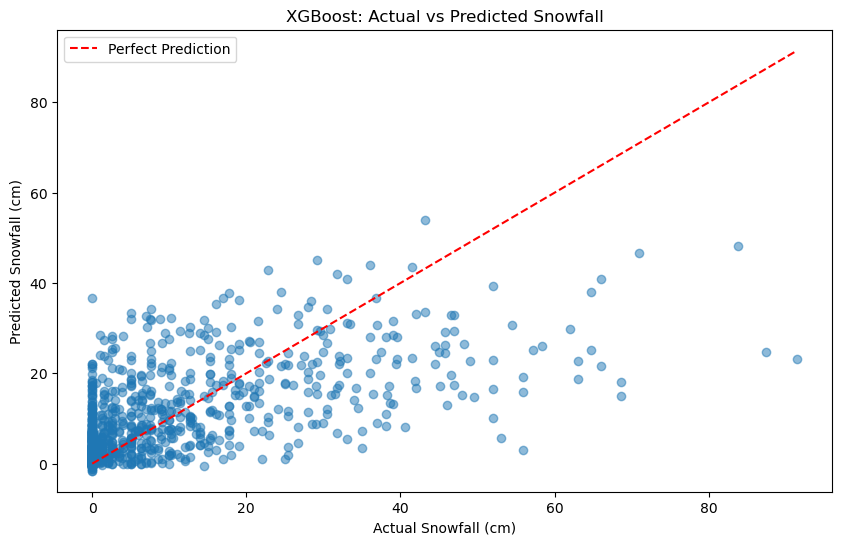

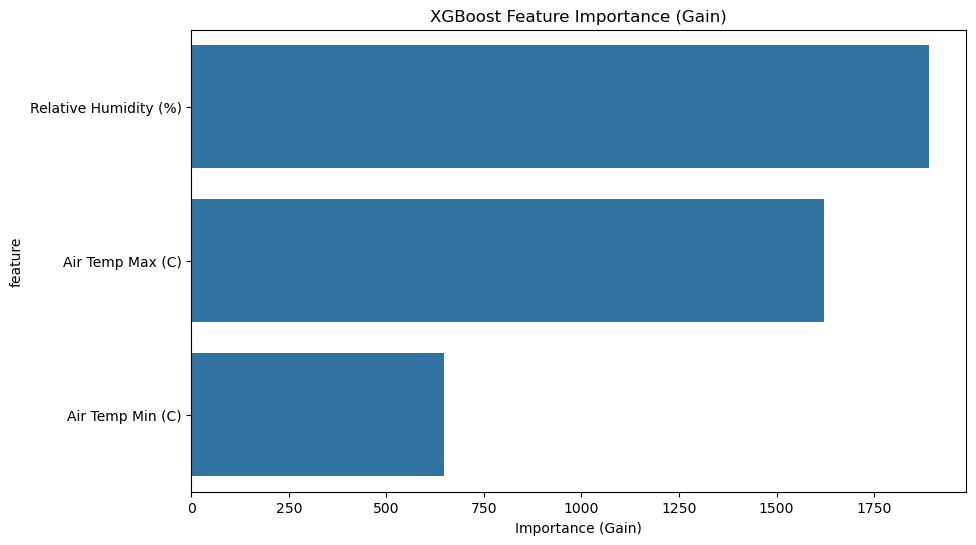


Feature Importance:
                 feature   importance
2  Relative Humidity (%)  1891.564697
0       Air Temp Max (C)  1620.256226
1       Air Temp Min (C)   647.572571


In [15]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare features and target
feature_names = ['Air Temp Max (C)', 'Air Temp Min (C)', 'Relative Humidity (%)']
X = cssl_data_humidity[feature_names]
y = cssl_data_humidity['New Snow (cm)']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert to DMatrix for faster processing
dtrain = xgb.DMatrix(X_train_scaled, label=y_train, feature_names=feature_names)
dtest = xgb.DMatrix(X_test_scaled, label=y_test, feature_names=feature_names)

# Set XGBoost parameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 6,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'min_child_weight': 3,
    'gamma': 0.1,
    'tree_method': 'hist'
}

# Train model
num_rounds = 200
model = xgb.train(
    params,
    dtrain,
    num_rounds,
    evals=[(dtrain, 'train'), (dtest, 'test')],
    early_stopping_rounds=20,
    verbose_eval=50
)

# Make predictions
y_pred_train = model.predict(dtrain)
y_pred_test = model.predict(dtest)

# Calculate metrics
def calculate_metrics(y_true, y_pred, dataset_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    
    print(f"\n{dataset_name} Metrics:")
    print(f"RMSE: {rmse:.2f} cm")
    print(f"MAE: {mae:.2f} cm")
    print(f"R²: {r2:.3f}")
    
    return rmse, mae, r2

# Calculate metrics for both sets
train_metrics = calculate_metrics(y_train, y_pred_train, "Training")
test_metrics = calculate_metrics(y_test, y_pred_test, "Test")

# Plot actual vs predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([0, y_test.max()], [0, y_test.max()], 'r--', label='Perfect Prediction')
plt.xlabel('Actual Snowfall (cm)')
plt.ylabel('Predicted Snowfall (cm)')
plt.title('XGBoost: Actual vs Predicted Snowfall')
plt.legend()
plt.show()

# Get feature importance with proper labels
importance_dict = model.get_score(importance_type='gain')
importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': [importance_dict.get(f, 0) for f in feature_names]
}).sort_values('importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=importance_df)
plt.title('XGBoost Feature Importance (Gain)')
plt.xlabel('Importance (Gain)')
plt.show()

# Print feature importance
print("\nFeature Importance:")
print(importance_df)